In [1]:
from training import *
from models import *
from dataprep import *
from dataprep2 import *

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.nn import functional as F
%matplotlib inline

In [3]:
e_dir = "test\\aaaaaaaa\\s001_2015_12_30\\01_tcp_ar\\aaaaaaaa_s001_t000.edf"

In [4]:
raw = mne.io.read_raw_edf(e_dir, preload = True)

Extracting EDF parameters from c:\Users\TheSy\Desktop\FinalEL7006\test\aaaaaaaa\s001_2015_12_30\01_tcp_ar\aaaaaaaa_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 323839  =      0.000 ...  1264.996 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB

Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 66 events and 1001 original time points ...
1 bad epochs dropped
Dropped 1 epoch: 64


Text(0.5, 0, 'Samples [s*Hz]')

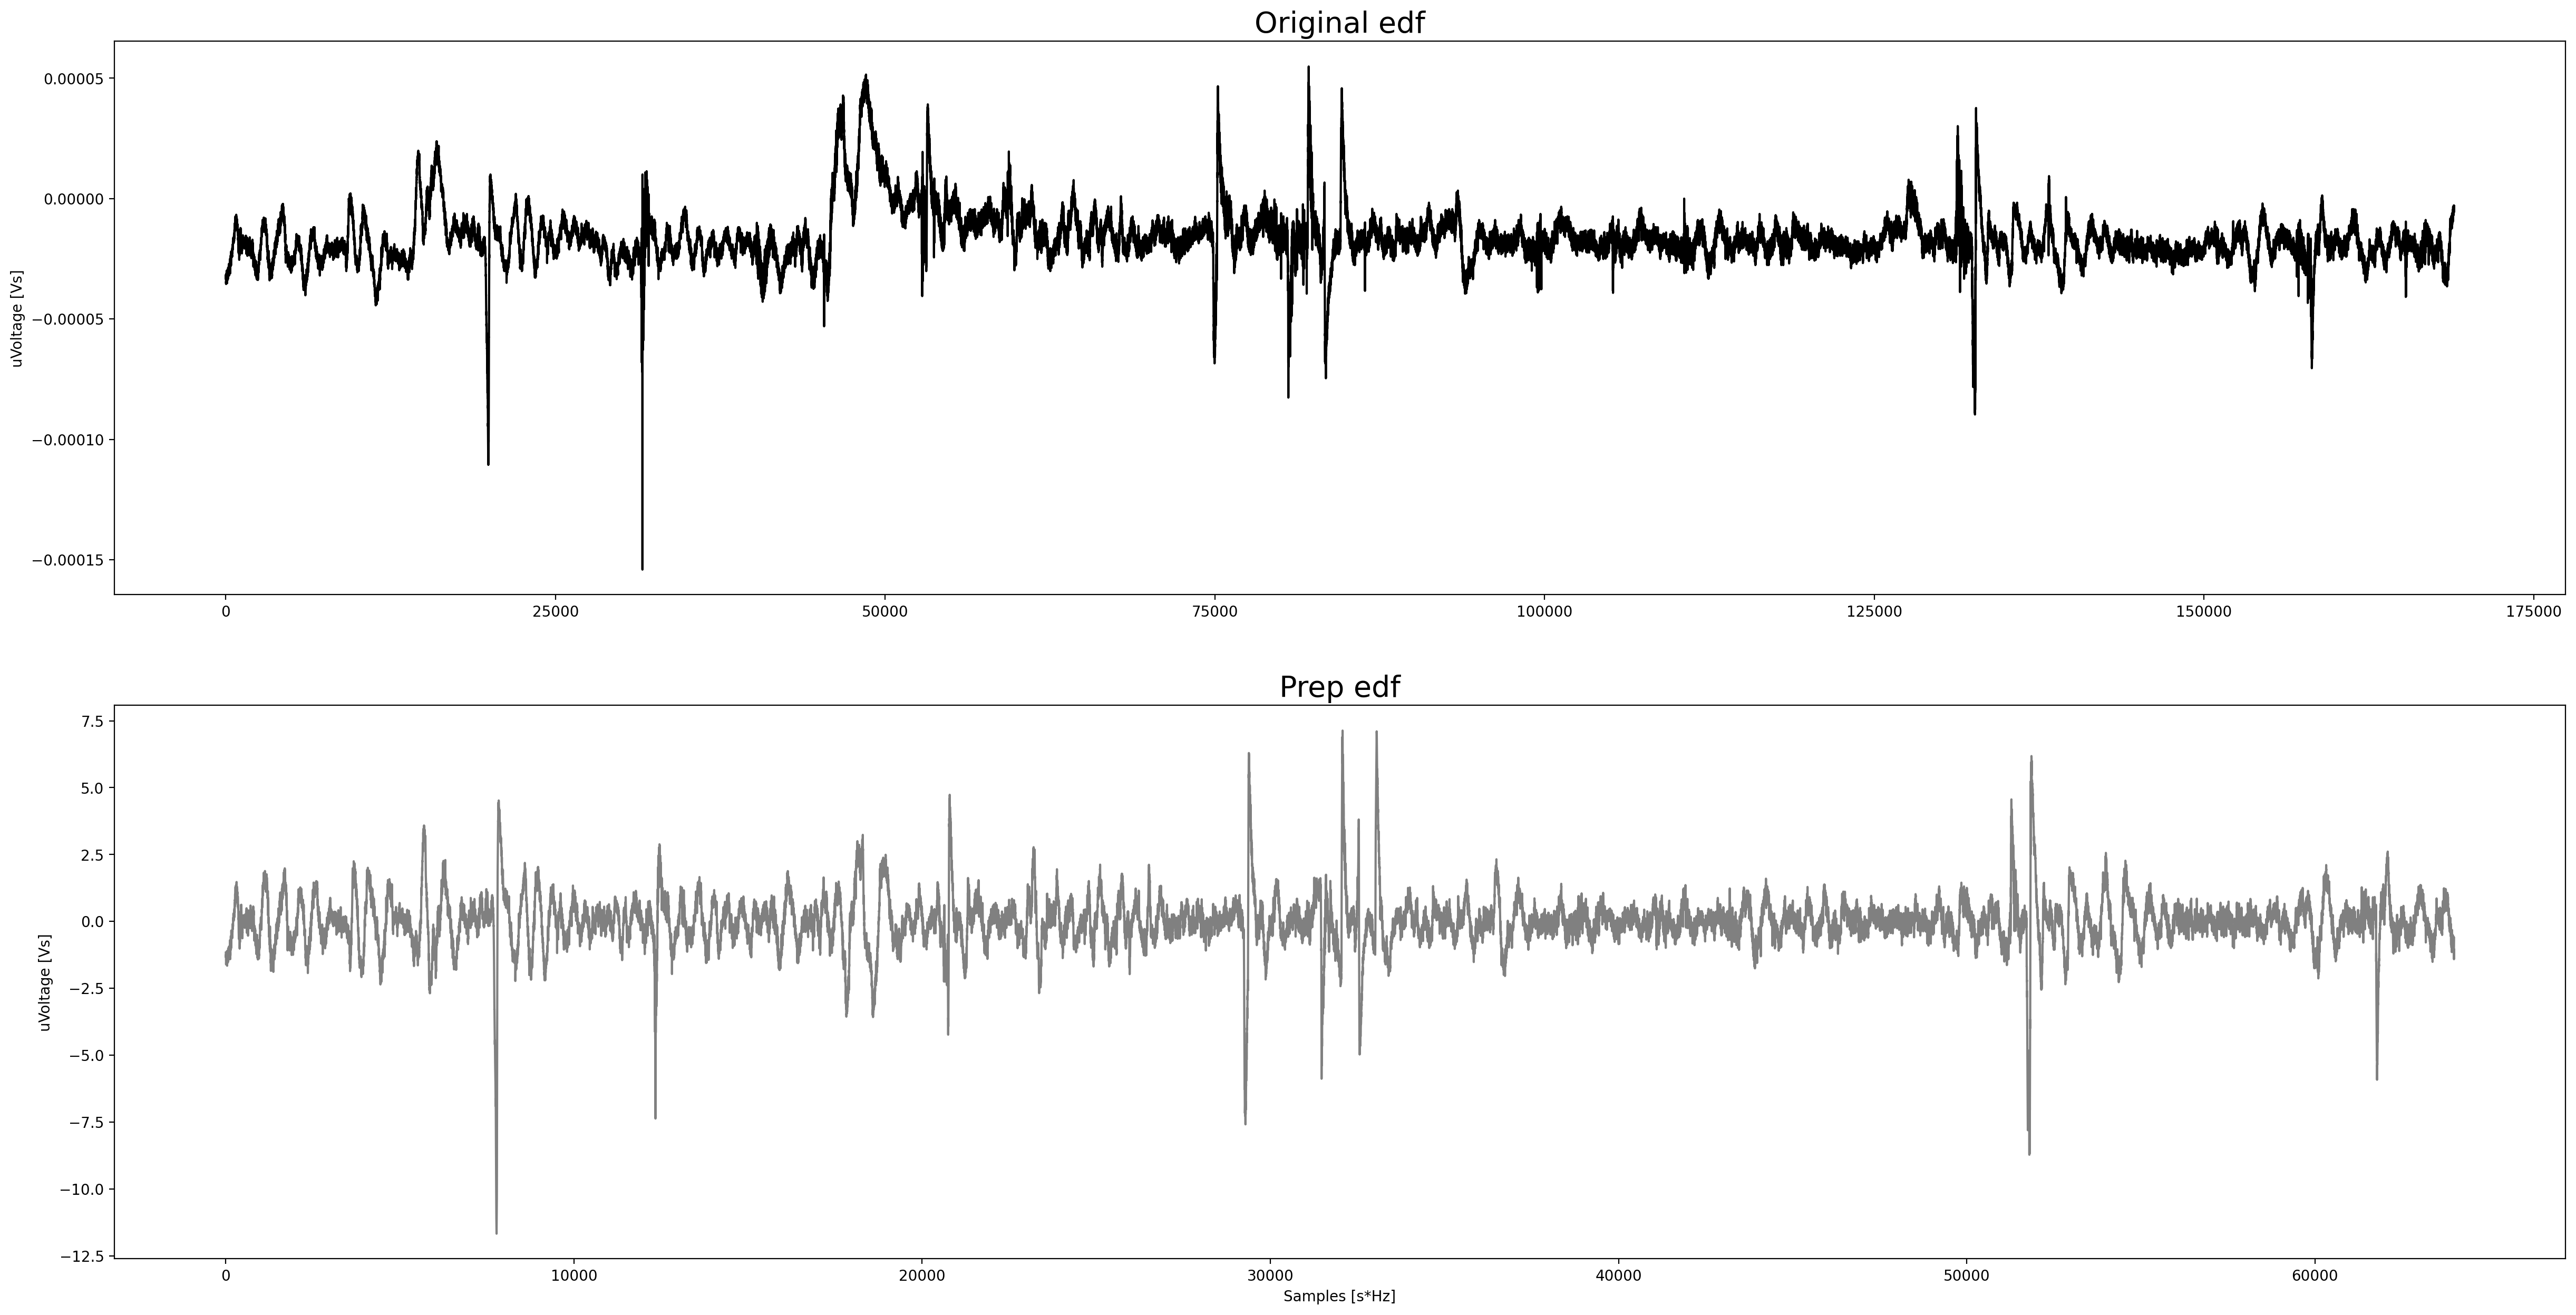

In [6]:
fig, axes = plt.subplots(nrows = 2, figsize=(30, 15), dpi =200)
names = ["Original", "Prep"]
axes[0].plot(raw.get_data()[0][256*60:256*12*60], color = "black", label = names[0])
axes[0].set_title(f"{names[0]} edf",fontsize = 20)
axes[0].set_ylabel("uVoltage [Vs]")


preprocessed = EDFprep(raw, n_channels=1, random=False)
f_channel = np.concatenate(preprocessed.squeeze())
axes[1].plot(f_channel, color = "gray", label = names[1])
axes[1].set_title(f"{names[1]} edf",fontsize = 20)
axes[1].set_ylabel("uVoltage [Vs]")
axes[1].set_xlabel("Samples [s*Hz]")

Ploting test\aaaaaaaa\s001_2015_12_30\01_tcp_ar\aaaaaaaa_s001_t000.edf
Extracting EDF parameters from c:\Users\TheSy\Desktop\FinalEL7006\test\aaaaaaaa\s001_2015_12_30\01_tcp_ar\aaaaaaaa_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 323839  =      0.000 ...  1264.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB

Not setting metadata
66 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 66 events and 1001 original time points ...
1 bad epochs dropped
Dropped 1 epoch: 64


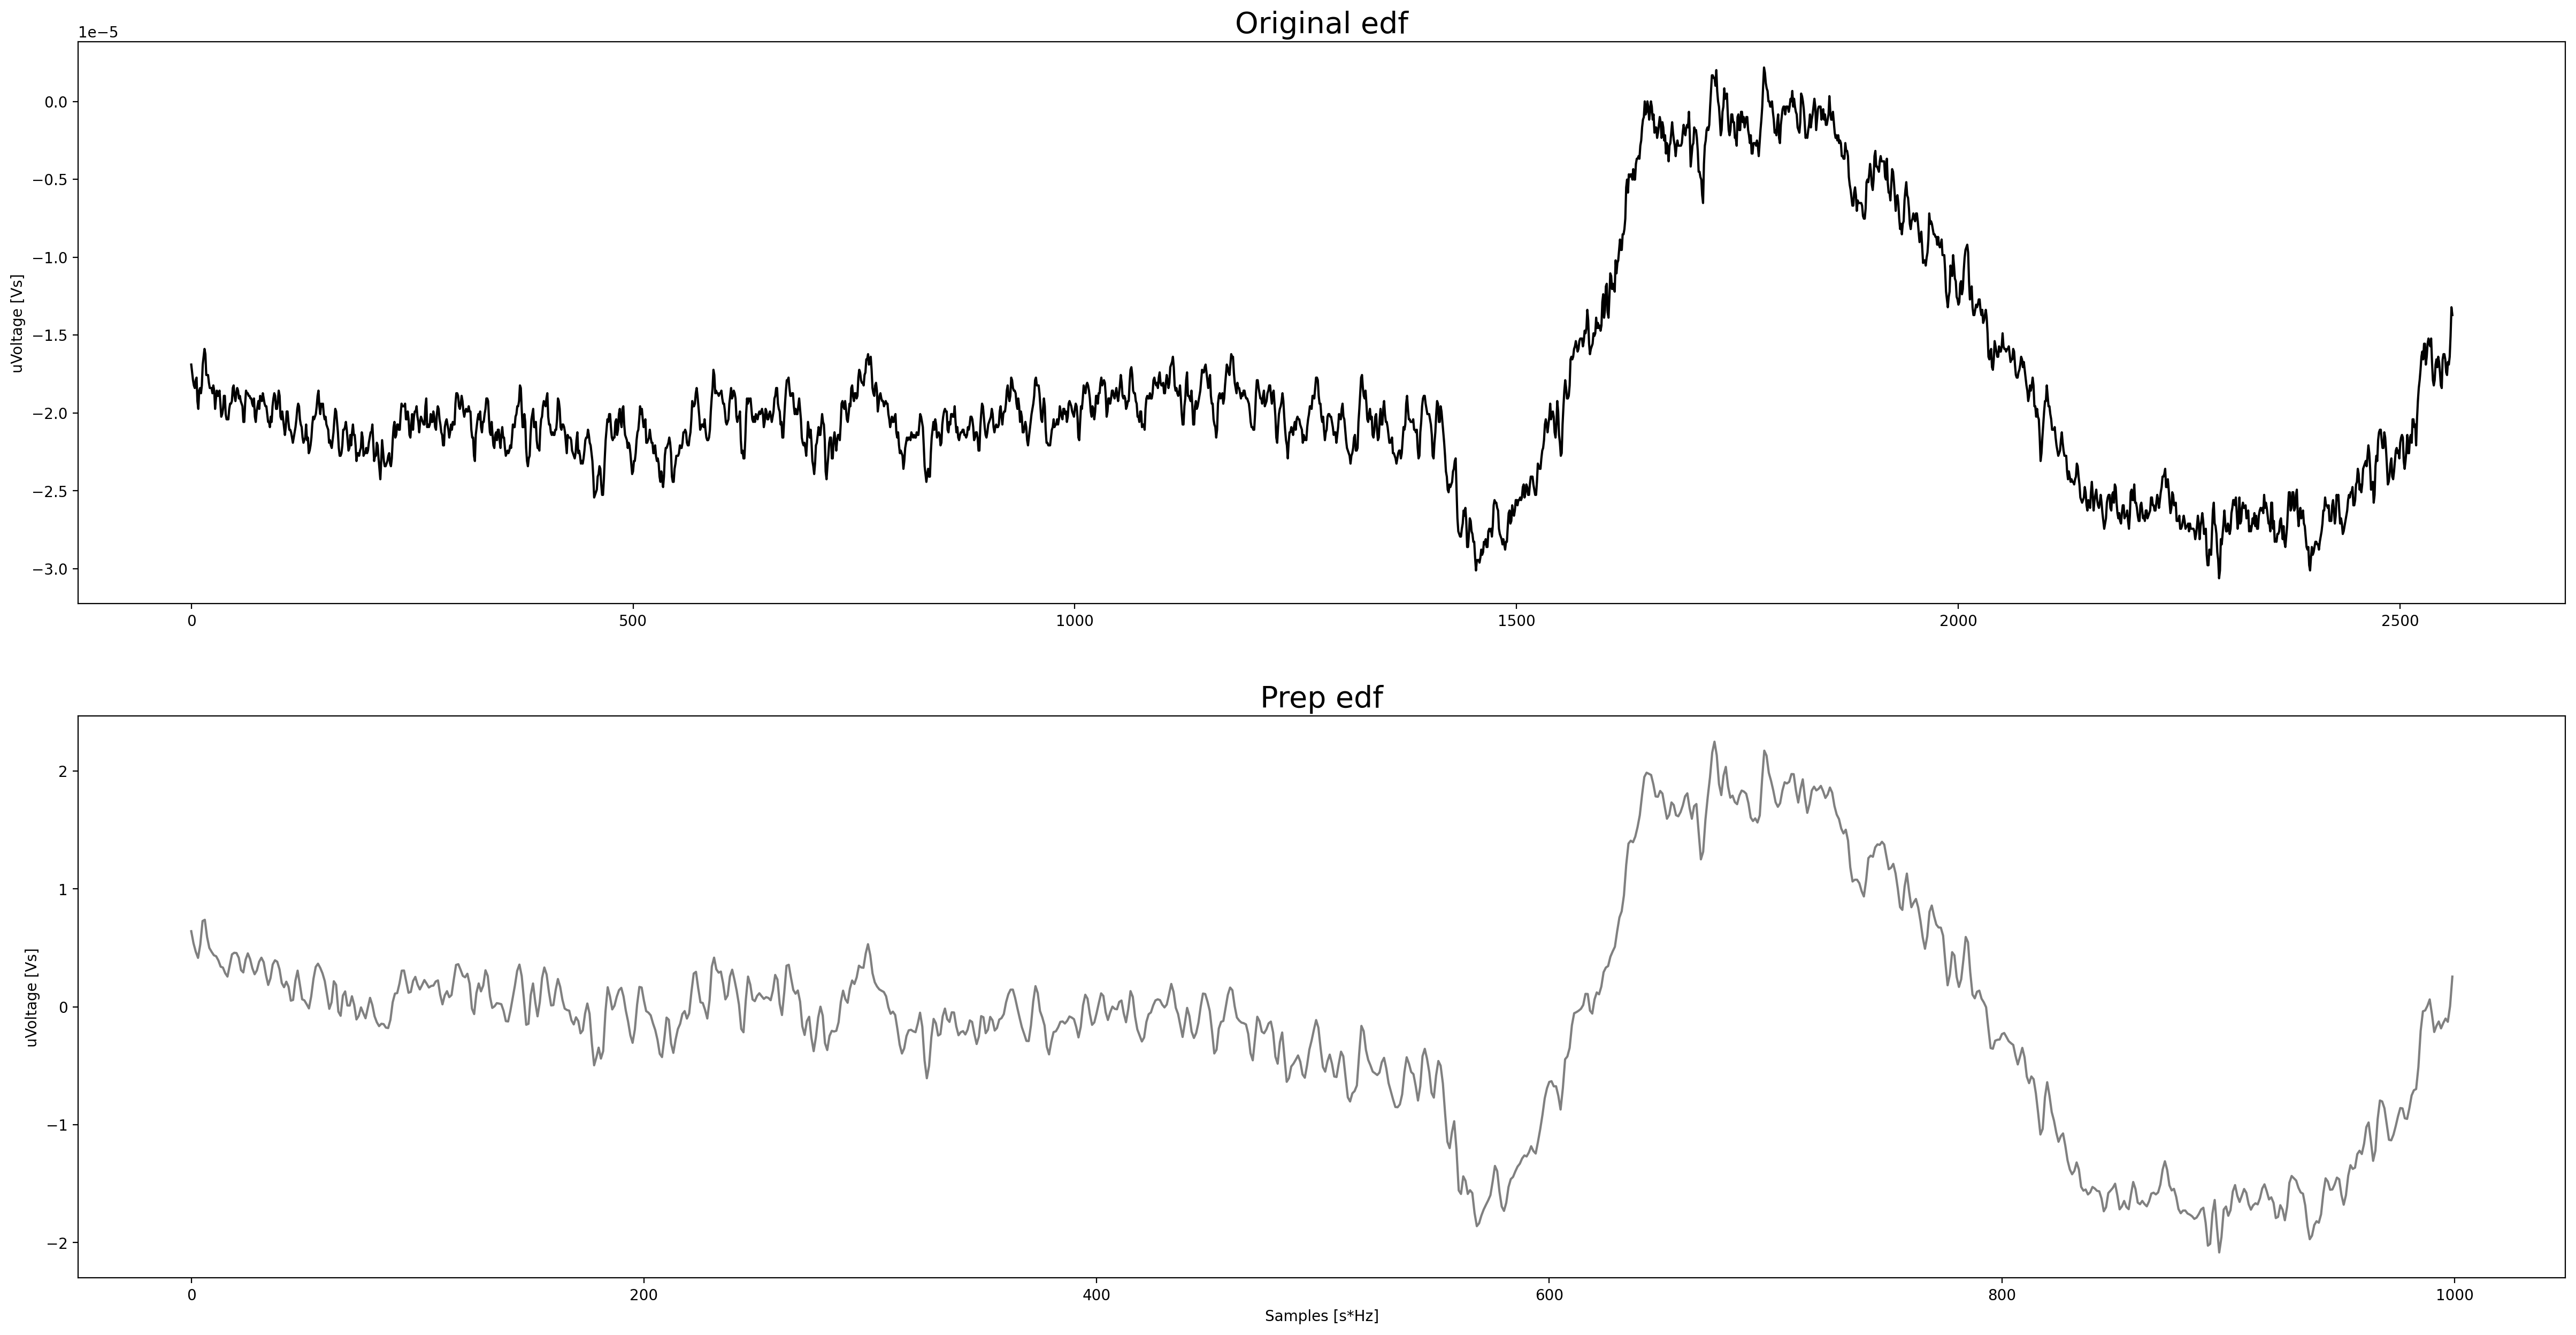

In [6]:
EDFplot(e_dir,vs_prep =True,f_prep=100,n_epoch=3,win_s=10)

In [6]:
AUGMENTATIONS

[<function dataprep2.Negation(channel: <built-in function array>)>,
 <function dataprep2.Time_Shift(channel: <built-in function array>, min_shift: int = 0, max_shift: int = 50)>,
 <function dataprep2.Amplitude(channel: <built-in function array>, max_amplitude: float = 1.5)>,
 <function dataprep2.DCVoltage(channel: <built-in function array>, max_magnitude: float = 0.5)>,
 <function dataprep2.GaussianNoise(channel: <built-in function array>, std: float = 0.2)>,
 <function dataprep2.Temporal_Invertion(channel: <built-in function array>)>,
 <function dataprep2.Permutation(channel: <built-in function array>, win_samples: int = 500)>,
 <function dataprep2.Masking(channel: <built-in function array>, window: int = 150)>]

In [7]:
preprocessed.shape

(64, 1, 1000)

In [8]:
def AugPlot(array, aug_idx ):
        names = ["Original", "Augmented"]
        fig, axes = plt.subplots(nrows = 2, figsize=(30, 15), dpi =200)
        # first_win_original = first_channel[(60)*raw_freq:(60+win_s)*raw_freq]
        axes[0].plot(array, color = "black", label = names[0])
        axes[0].set_title(f"{names[0]} edf",fontsize = 20)
        axes[0].set_ylabel("uVoltage [Vs]")

        processed = AUGMENTATIONS[aug_idx](array)
        axes[1].plot(processed, color = "gray", label = names[1])
        axes[1].set_title(f"{names[1]} with {AUGMENTATIONS[aug_idx].__name__} edf",fontsize = 20)
        axes[1].set_ylabel("uVoltage [Vs]")
        axes[1].set_xlabel("Samples [s*Hz]")
        plt.show()

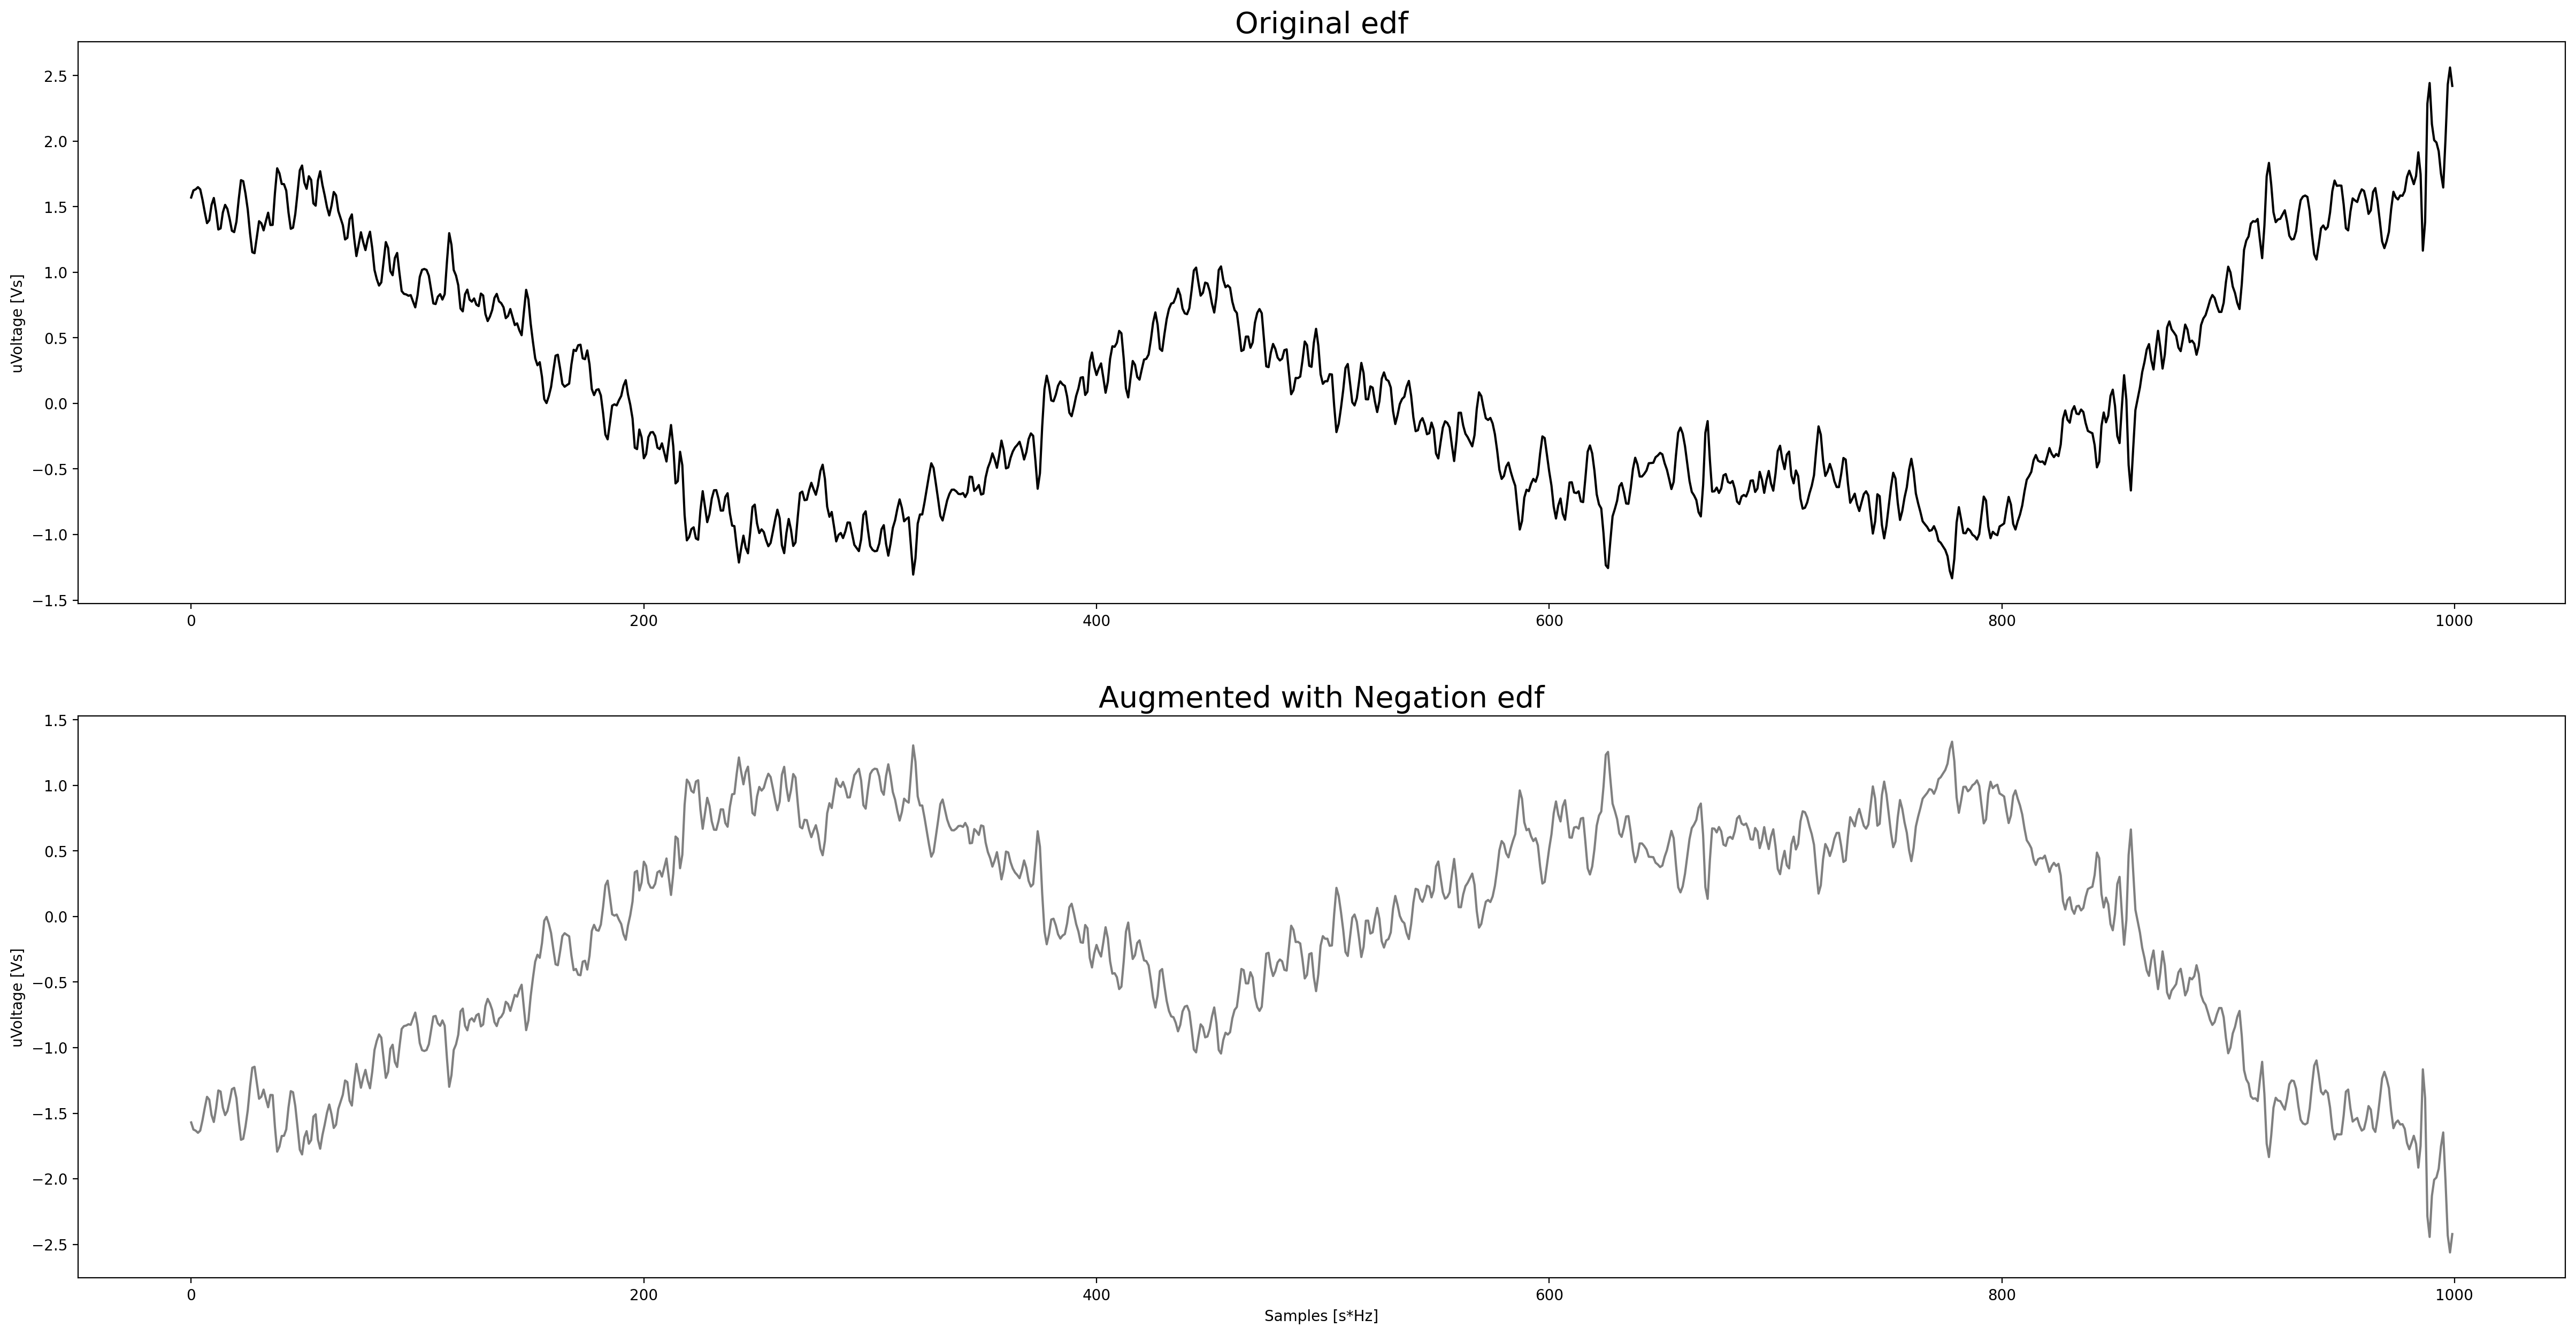

In [9]:
AugPlot(preprocessed[53][0], 0)

In [10]:
import umap

In [11]:
# prep("C:\\Users\\TheSy\\Desktop\\test", mode = "per_channel", save = True, save_dir = "data",)

In [12]:
dataset = CustomEEGDataset("prep_channels.csv", "")

In [30]:
r_idx = np.random.choice(np.arange(0, len(dataset),1),size=100,replace=False)

In [31]:
data = dataset[r_idx]

In [32]:
data = data.unsqueeze(dim = 1)

In [33]:
data.shape

torch.Size([100, 1, 1000])

torch.Size([100, 4, 1000])
torch.Size([100, 4, 1000])
Latent space
(100, 2)


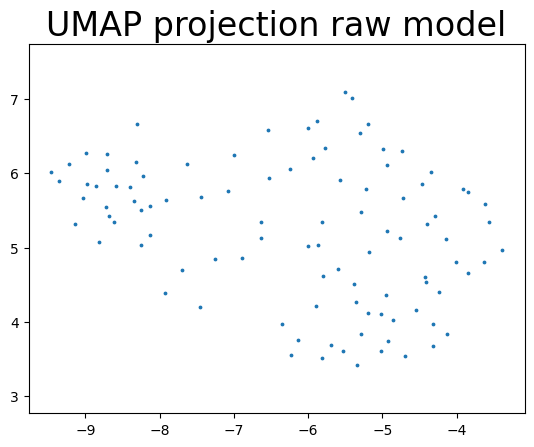

In [37]:
model = Pretext()
output = model.encoder(data)
print(output.shape)

output = model.encoder(data)
print(output.shape)

print("Latent space")
reducer = umap.UMAP()
# scaled_penguin_data = StandardScaler().fit_transform(output)
scaled_penguin_data = F.normalize(output,dim = 1).detach().numpy()

scaled_penguin_data= scaled_penguin_data.reshape(100, 4000)
embedding = reducer.fit_transform(scaled_penguin_data)
print(embedding.shape)
plt.scatter(
embedding[:, 0],
embedding[:, 1],
s = 3,)


plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection raw model', fontsize=24);
plt.show()

Params loaded
torch.Size([100, 4, 1000])
Latent space


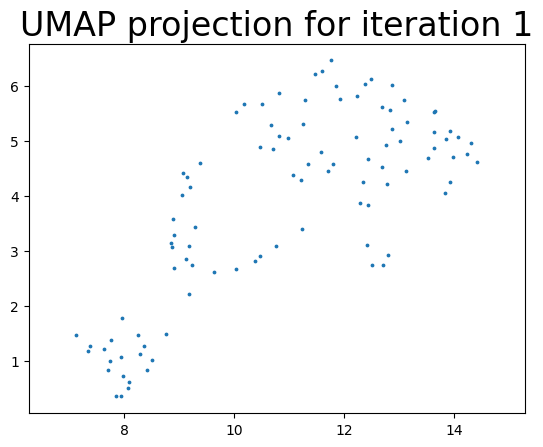

Params loaded
torch.Size([100, 4, 1000])
Latent space


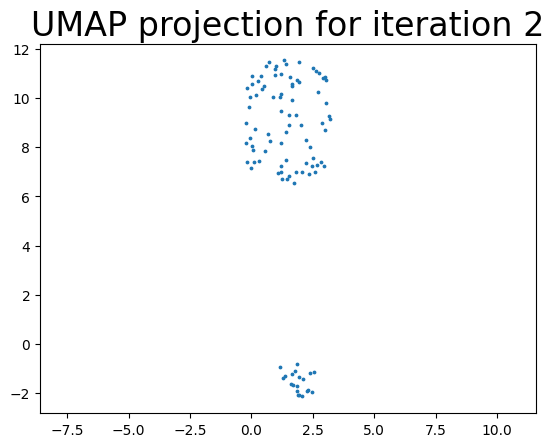

Params loaded
torch.Size([100, 4, 1000])
Latent space


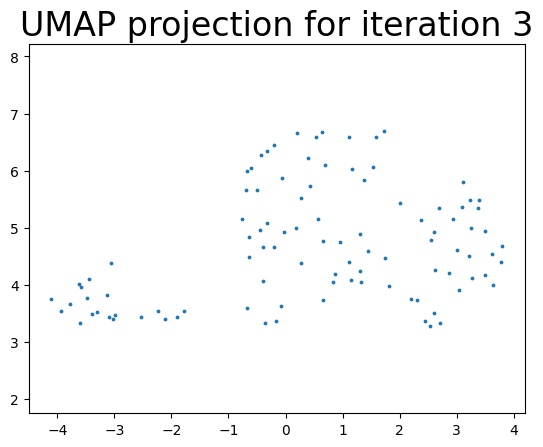

Params loaded
torch.Size([100, 4, 1000])
Latent space


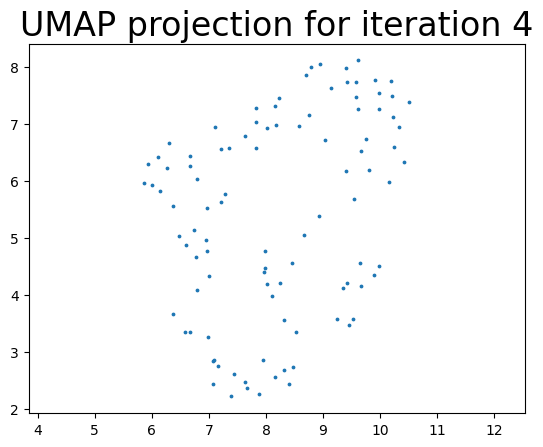

Params loaded
torch.Size([100, 4, 1000])
Latent space


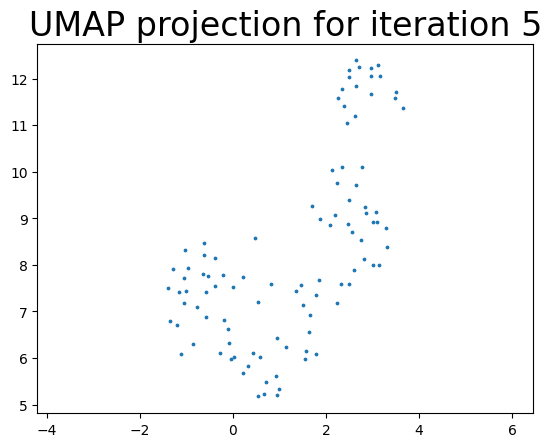

Params loaded
torch.Size([100, 4, 1000])
Latent space


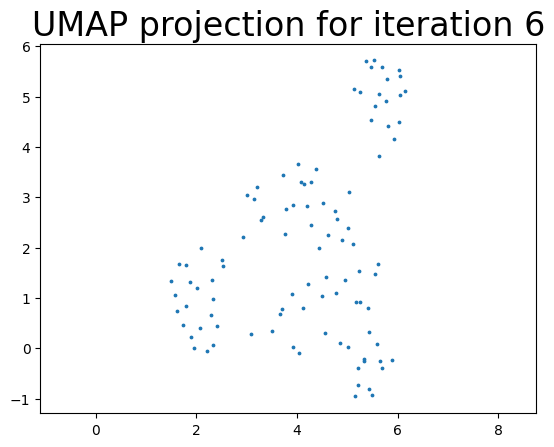

Params loaded
torch.Size([100, 4, 1000])
Latent space


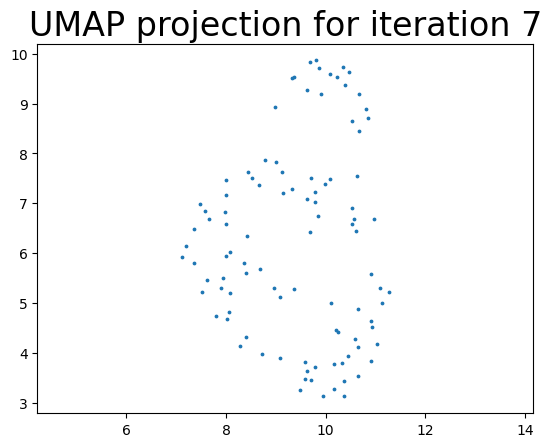

Params loaded
torch.Size([100, 4, 1000])
Latent space


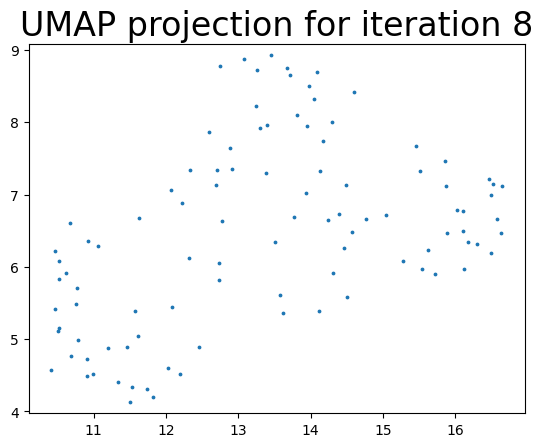

Params loaded
torch.Size([100, 4, 1000])
Latent space


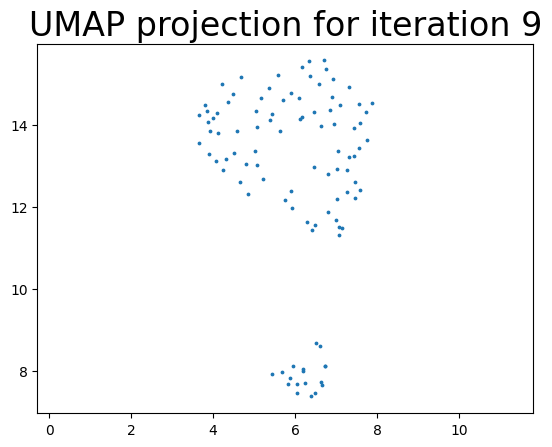

Params loaded
torch.Size([100, 4, 1000])
Latent space


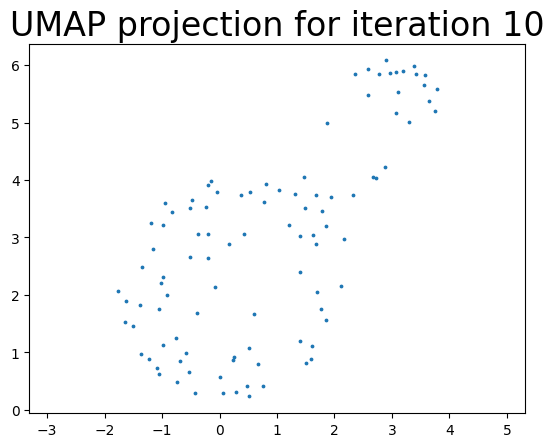

Params loaded
torch.Size([100, 4, 1000])
Latent space


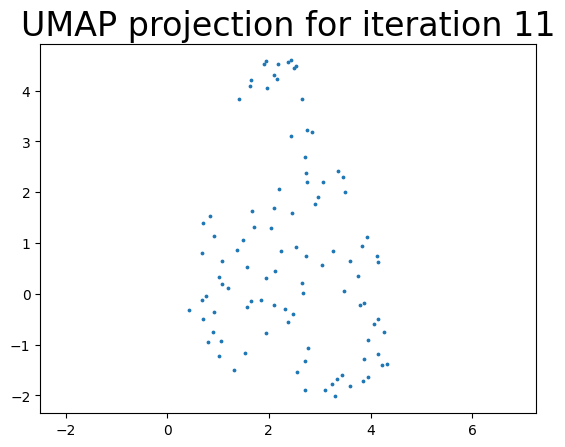

Params loaded
torch.Size([100, 4, 1000])
Latent space


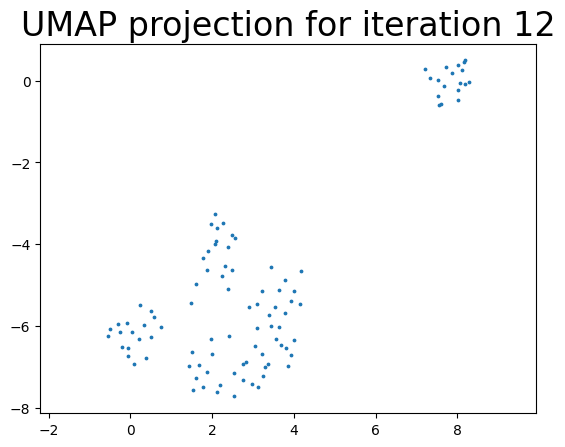

In [38]:
for i in range(1,13):
    model = Pretext()
    dicc = torch.load(f"params\\LastencoderINF_{i}.pt")
    params = dicc["params"]
    model.load_state_dict(params)
    print("Params loaded")
    output = model.encoder(data)
    print(output.shape)

    print("Latent space")
    reducer = umap.UMAP()
    # scaled_penguin_data = StandardScaler().fit_transform(output)
    scaled_penguin_data = F.normalize(output,dim = 1).detach().numpy()

    scaled_penguin_data= scaled_penguin_data.reshape(100, 4000)
    embedding = reducer.fit_transform(scaled_penguin_data)

    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 3,)


    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'UMAP projection for iteration {i}', fontsize=24);
    plt.show()